## 1. Import the necessary libraries


In [2]:
%matplotlib inline
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
import plotly.express as px
import plotly.graph_objects as go

- Matplotlib: Matplotlib is one of the oldest and most flexible plotting libraries for Python. First released in 2003, it provides a MATLAB-like interface and is the foundation for many other Python visualization libraries.

- Seaborn: Seaborn is built on top of Matplotlib and provides a higher-level interface. Seaborn specializes in statistical visualizations and has built-in themes for more attractive plots.

- Pandas: Pandas has its own plotting functionality, which is a wrapper around Matplotlib. Pandas' plotting functions are convenient for quick visualizations directly from DataFrames.

- Plotly: Plotly is a modern, interactive plotting library that works in both Python and JavaScript. It creates web-based visualizations that are highly interactive and can be easily shared online. It supports a wide range of chart types, including 3D plots and animations.

- Bokeh: Bokeh is a Python library for creating interactive visualizations for modern web browsers. It's designed for presenting large datasets and streaming data. Bokeh can create standalone web applications or be embedded in Jupyter notebooks.

- ggplot: ggplot is originally an R library, part of the tidyverse ecosystem.
There's a Python port called plotnine that implements the grammar of graphics in Python. ggplot is based on the idea of building plots layer by layer, which provides a consistent and powerful approach to data visualization. It's particularly good for creating complex, multi-layered statistical graphics.

## Load Data

In [3]:
#create a folder with all the data files there and get the path to that folder
my_drive_path = "/content/drive/MyDrive/SUNY/Class Material/2024 Fall/MSA550A/Python Class Work/msa550-code-files/data/"

In [4]:
housing_df = pd.read_csv(my_drive_path+'BostonHousing.csv')

#in this data we can have different tasks:
#1. predicting the median value of a home in a tract (medv)
#2. classifying the binary var cat.medv as 1 or 0 indicating whether the home price is over or below 30k

housing_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [5]:
amtrak_df = pd.read_csv(my_drive_path + 'Amtrak.csv')
#we can focus on predicting the monthly ridership

amtrak_df.head(5)

,Month,Ridership
0,01/01/1991,1708.917
1,01/02/1991,1620.586
2,01/03/1991,1972.715
3,01/04/1991,1811.665
4,01/05/1991,1974.964


In [6]:
#notice that the Month column is of type object
amtrak_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      159 non-null    object 
 1   Ridership  159 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [7]:
#This line is converting the 'Month' column to datetime and creating a new 'Date' column.
amtrak_df['Date'] = pd.to_datetime(amtrak_df.Month, format='%d/%m/%Y')
print(amtrak_df.head(5))

        Month  Ridership       Date
0  01/01/1991   1708.917 1991-01-01
1  01/02/1991   1620.586 1991-02-01
2  01/03/1991   1972.715 1991-03-01
3  01/04/1991   1811.665 1991-04-01
4  01/05/1991   1974.964 1991-05-01


In [8]:
#This creates a time series of ridership data indexed by the date.
ridership_ts = pd.Series(amtrak_df.Ridership.values, index=amtrak_df.Date)
ridership_ts

,0
Date,
1991-01-01,1708.917
1991-02-01,1620.586
1991-03-01,1972.715
1991-04-01,1811.665
1991-05-01,1974.964
...,...
2003-11-01,2076.054
2003-12-01,2140.677
2004-01-01,1831.508


## Amtrak Ridership - Line Plot

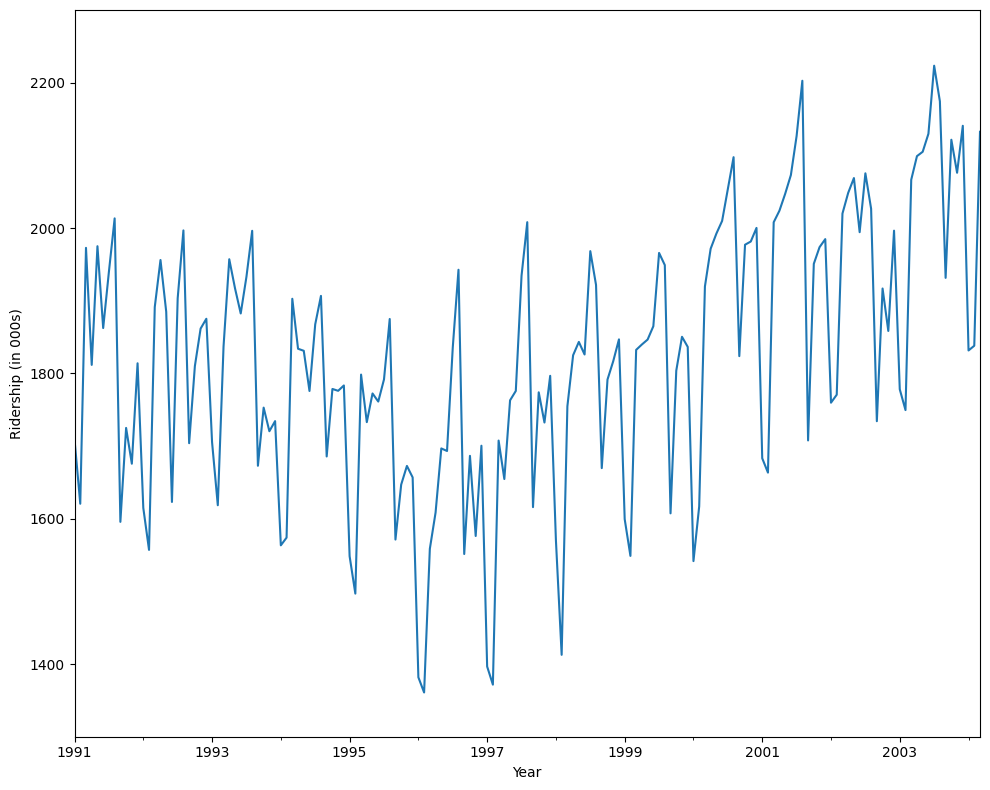

In [9]:
#line graph is useful to see the overall lever over time

#Using pandas for a line Graph:
ridership_ts.plot(ylim=[1300, 2300], legend=False, figsize=[10, 8])
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Ridership (in 000s)')

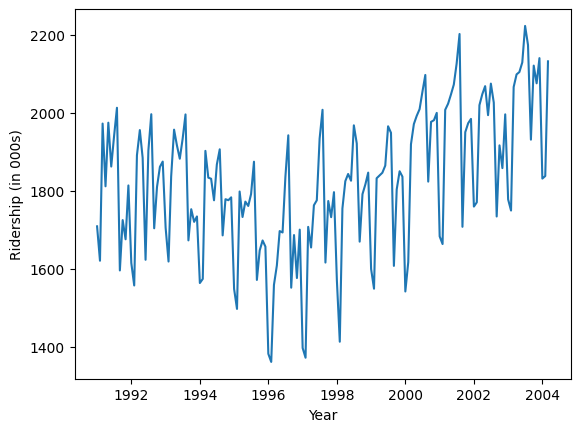

In [10]:
# alternative plot with matplotlib
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label

In [11]:
#keep in mind that ridership_ts is not a dataframe - so the index is the date and the values are riders
fig = px.line(x=ridership_ts.index, y=ridership_ts.values,
              labels={'x': 'Year', 'y': 'Ridership (in 000s)'},
              title='Ridership Over Time')

fig.update_layout(yaxis_range=[1300, 2300])  # Set y-axis range

fig.show()

## Boston Housing - Scatter Plot

<Axes: xlabel='LSTAT', ylabel='MEDV'>

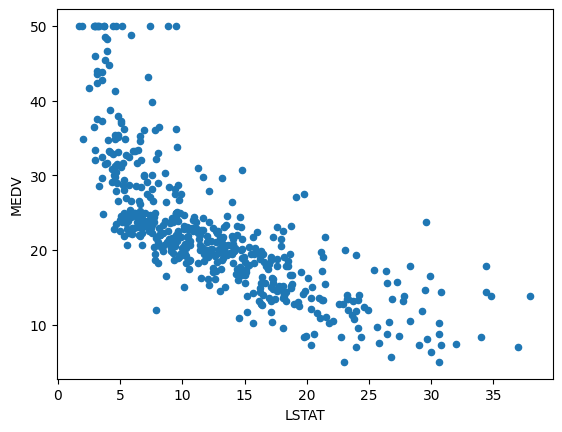

In [12]:
#scatter plot is useful in looking at relationship between two numerical variables

#using pandas
# rename CAT. MEDV column for easier data handling
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)

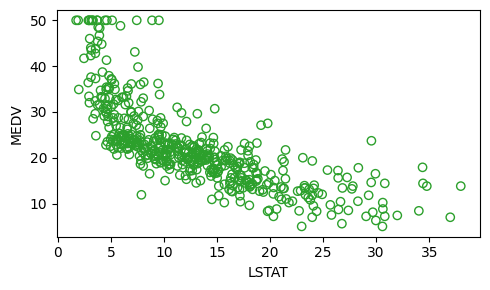

In [13]:

#using matplotlib
# Set the color of the points in the scatterplot and draw as open circles.
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

ax.scatter(housing_df.LSTAT, housing_df.MEDV, color='C2', facecolor='none')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.tight_layout()
plt.show()

In [14]:
fig = px.scatter(housing_df, x='LSTAT', y='MEDV',
                 color_discrete_sequence=['red'],
                 title='Scatter Plot of LSTAT vs. MEDV')

fig.update_traces(marker=dict(size=5, symbol='circle-open'))

fig.update_layout(
    xaxis_title='LSTAT',
    yaxis_title='MEDV'
)

fig.show()

In [15]:
# Print some statistics

correlation = housing_df['LSTAT'].corr(housing_df['MEDV'])

print(f"Correlation between LSTAT and MEDV: {correlation:.2f}")
print(f"Mean LSTAT: {housing_df['LSTAT'].mean():.2f}")
print(f"Mean MEDV: {housing_df['MEDV'].mean():.2f}")

Correlation between LSTAT and MEDV: -0.74
Mean LSTAT: 12.65
Mean MEDV: 22.53


- Negative Correlation: There's a strong negative correlation between LSTAT (% lower status of the population) and MEDV (median home value). This suggests that areas with a higher percentage of lower status population tend to have lower median home values.

- Non-linear Relationship: The scatter plot shows a non-linear relationship. The trend isn't perfectly linear, suggesting that the relationship between LSTAT and MEDV might be more complex than a simple linear correlation.

- Outliers: Look for any points that are far from the main cluster. These could represent unique neighborhoods or data anomalies worth investigating.

- Clustering: There seems to be a cluster of homes with high MEDV and low LSTAT. These might represent more affluent neighborhoods.

- Variability: The spread of MEDV values seems to decrease as LSTAT increases, suggesting that there's less variability in home prices in areas with a higher percentage of lower status population.

## Boston Housing - Bar Chart (Categorical Values)

In [16]:
housing_df.groupby('CHAS').mean()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CHAS,,,,,,,,,,,,,
0,3.744447,11.634820,11.019193,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,12.757941,22.093843,0.154989
1,1.851670,7.714286,12.719143,0.593426,6.519600,77.500000,3.029709,9.314286,386.257143,17.491429,11.241714,28.440000,0.314286


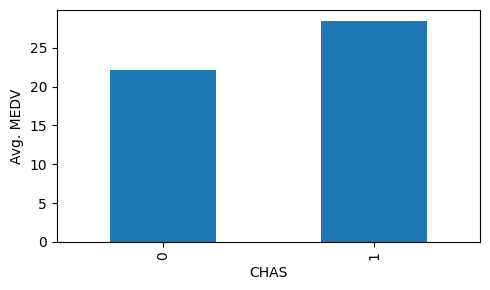

In [17]:
#using pandas
ax = housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Avg. MEDV')

plt.tight_layout()
plt.show()

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64


Text(0, 0.5, 'Avg. MEDV')

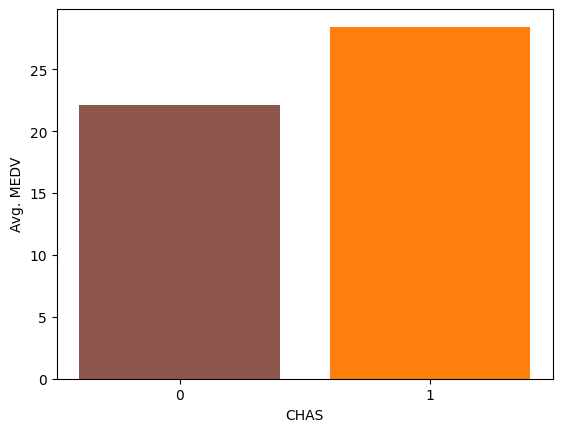

In [18]:
#using matplotlib
dataForPlot = housing_df.groupby('CHAS').mean().MEDV
print(dataForPlot)
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
#ax.set_xticks([0, 1], False)
ax.set_xticks([0,1], minor=False)
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg. MEDV')

In [19]:


dataForPlot = housing_df.groupby('CHAS').mean().MEDV

fig = go.Figure()
fig.add_trace(go.Bar(
    x=dataForPlot.index,
    y=dataForPlot,
    marker_color=['lightskyblue', 'mistyrose'],
))

fig.update_layout(
    xaxis_title='CHAS',
    yaxis_title='Avg. MEDV',
    xaxis=dict(
        tickvals=[0, 1],  # Set the tick values for x-axis
        tickmode='array',  # Specify tick mode as an array
    )
)

fig.show()


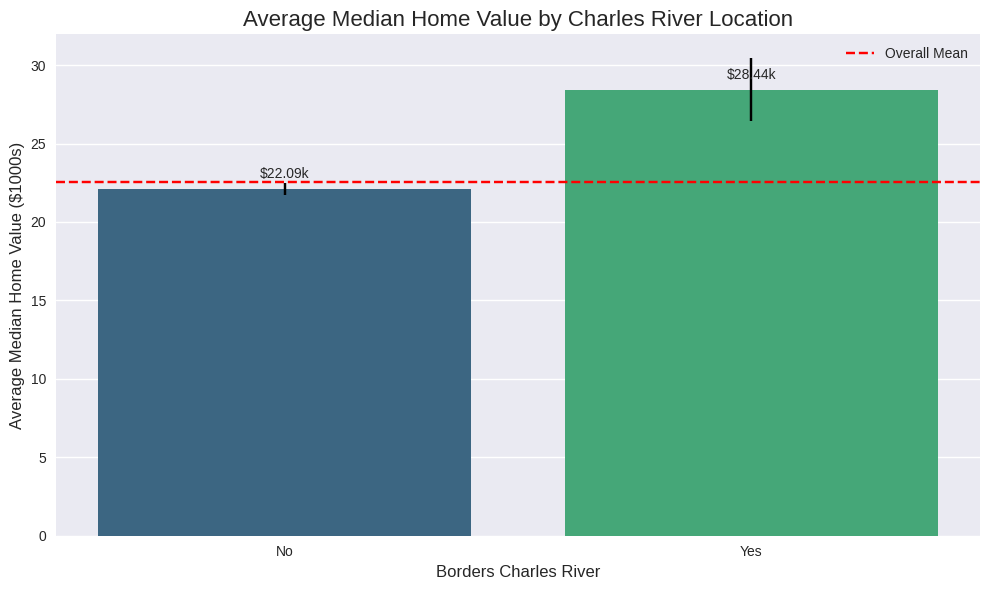

Overall mean MEDV: $22.53k
Mean MEDV (Not bordering Charles River): $22.09k
Mean MEDV (Bordering Charles River): $28.44k
Difference: $6.35k

t-statistic: -3.9964
p-value: 0.0001


In [20]:
#bar chart is useful to see differences between subgroups

#Bar Chart for Categorical Variable
#Average median neighborhood value for neighborhoods that do and do not border the Charles River

# Set the style for better-looking plots
plt.style.use('seaborn-v0_8')  # Use the updated style name

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the mean MEDV for each CHAS category
mean_medv = housing_df.groupby('CHAS')['MEDV'].mean()

# Create the bar plot
sns.barplot(x=mean_medv.index, y=mean_medv.values, ax=ax, hue=mean_medv.index, palette='viridis', legend=False)

# Customize the plot
ax.set_title('Average Median Home Value by Charles River Location', fontsize=16)
ax.set_xlabel('Borders Charles River', fontsize=12)
ax.set_ylabel('Average Median Home Value ($1000s)', fontsize=12)
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])

# Add value labels on top of each bar
for i, v in enumerate(mean_medv.values):
    ax.text(i, v + 0.5, f'${v:.2f}k', ha='center', va='bottom')

# Add a horizontal line for the overall mean
overall_mean = housing_df['MEDV'].mean()
ax.axhline(y=overall_mean, color='r', linestyle='--', label='Overall Mean')

# Add error bars (standard error of the mean)
sem = housing_df.groupby('CHAS')['MEDV'].sem()
ax.errorbar(x=mean_medv.index, y=mean_medv.values, yerr=sem, fmt='none', c='black', capsize=5)

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Overall mean MEDV: ${overall_mean:.2f}k")
print(f"Mean MEDV (Not bordering Charles River): ${mean_medv[0]:.2f}k")
print(f"Mean MEDV (Bordering Charles River): ${mean_medv[1]:.2f}k")
print(f"Difference: ${mean_medv[1] - mean_medv[0]:.2f}k")

# Perform t-test to check if the difference is statistically significant
from scipy import stats

not_charles = housing_df[housing_df['CHAS'] == 0]['MEDV']
charles = housing_df[housing_df['CHAS'] == 1]['MEDV']
t_stat, p_value = stats.ttest_ind(not_charles, charles)

print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Average Home Values:
- Overall mean MEDV (Median Value of Owner-Occupied Homes): 22.53K
- Mean MEDV for homes not bordering Charles River: 22.09K
- Mean MEDV for homes bordering Charles River: 28.44K


Charles River Effect:
- Homes bordering the Charles River have a higher average value (28.44K) compared to those that don't (22.09K).
- The difference is 6.35k, which is substantial – about 28.7% higher than the non-riverside properties.



Statistical Significance:
- The t-statistic is -3.9964, which indicates a large difference between the two groups.
T- he p-value is 0.0001, which is much less than the conventional significance level of 0.05.
- This extremely low p-value suggests that the difference in home values between properties bordering and not bordering the Charles River is statistically significant and very unlikely to have occurred by chance.


Insights and Implications:

- Riverside Premium: There's a clear "riverside premium" in the Boston housing market. Properties bordering the Charles River command significantly higher values on average.

- Magnitude of Effect: The $6.35k difference represents a substantial increase in property value. This could be due to factors such as better views, recreational opportunities, or the prestige associated with riverside locations.

- Market Dynamics: This information could be valuable for real estate professionals, homebuyers, and sellers in understanding price differentials in the Boston area.

- Urban Planning: City planners and policymakers might use this information when considering development projects or conservation efforts along the Charles River, recognizing the added value that riverside properties bring to the city's tax base.

- Investment Potential: Investors in real estate might see properties near the Charles River as potentially more valuable investments, given the significant price premium.

- Further Research Opportunities: While we've established a strong correlation between Charles River proximity and higher home values, it would be worthwhile to investigate other factors that might be contributing to this difference (e.g., are riverside properties also in neighborhoods with better schools or lower crime rates?).

- Limitations: Remember that this data represents a snapshot in time. The housing market can change, and the premium for riverside properties could fluctuate based on various economic and environmental factors.

## Boston Housing - Distribution Plot

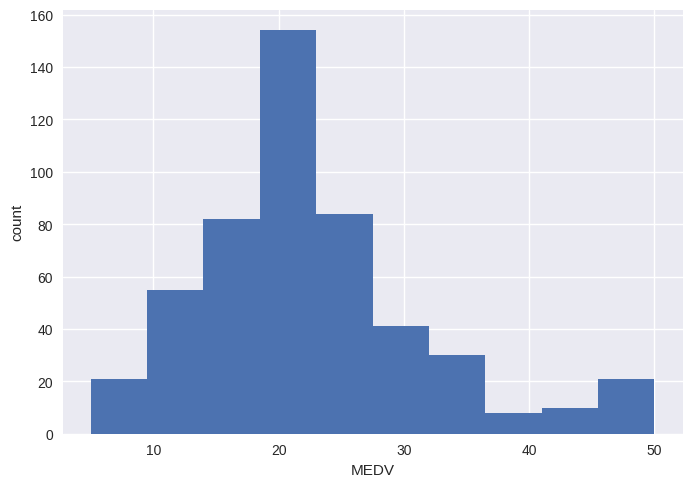

In [21]:
ax = housing_df.MEDV.hist()
ax.set_xlabel('MEDV')
ax.set_ylabel('count')

plt.show()

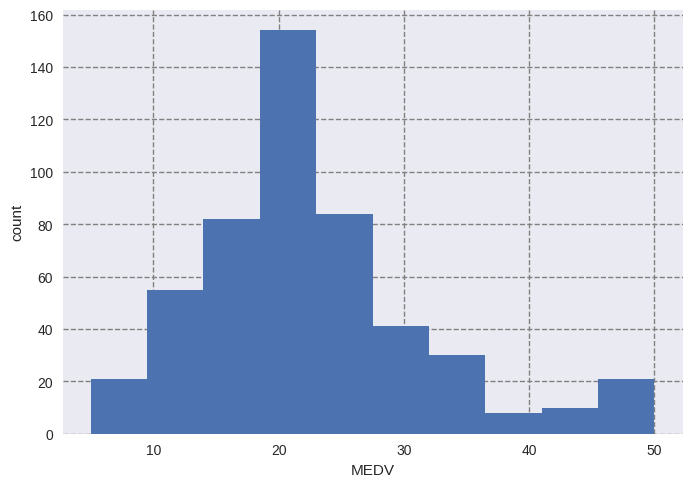

In [22]:
fig, ax = plt.subplots()
ax.hist(housing_df.MEDV)
ax.set_axisbelow(True)  # Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
ax.set_xlabel('MEDV')
ax.set_ylabel('count')
plt.show()

In [23]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=housing_df['MEDV'],
    marker_color='blue',  # Set the color of the bars
    opacity=0.7,  # Set the opacity of the bars
))

fig.update_layout(
    xaxis_title='MEDV',
    yaxis_title='Count',
    xaxis=dict(
        showgrid=True,  # Show the grid lines
        gridcolor='lightpink',  # Set the grid color
        gridwidth=1,  # Set the grid line width
    ),
)

fig.show()

In [24]:
print(f"Mean MEDV: ${housing_df['MEDV'].mean():.2f}k")
print(f"Median MEDV: ${housing_df['MEDV'].median():.2f}k")
print(f"Standard Deviation of MEDV: ${housing_df['MEDV'].std():.2f}k")
print(f"Minimum MEDV: ${housing_df['MEDV'].min():.2f}k")
print(f"Maximum MEDV: ${housing_df['MEDV'].max():.2f}k")

Mean MEDV: $22.53k
Median MEDV: $21.20k
Standard Deviation of MEDV: $9.20k
Minimum MEDV: $5.00k
Maximum MEDV: $50.00k


Some Insights

- Market Diversity: The wide range (5.00k to 50.00k) suggests a diverse housing market in Boston, catering to various income levels and preferences.

- Positive Skew: The mean being higher than the median indicates a positively skewed distribution. This is common in housing markets, where there's often a "long tail" of high-value properties.

- Luxury Segment: The maximum value of 50.00k, which is more than twice the mean, suggests the presence of a luxury housing segment in Boston.

- Affordable Housing: The minimum value of 5.00k, which is less than a quarter of the mean, indicates the existence of more affordable housing options.

- Further Analysis: It would be valuable to investigate how other factors in the dataset (like crime rate, accessibility to highways, etc.) correlate with these home values to understand what drives prices in different segments of the market.



## Boston Housing - Box Plots

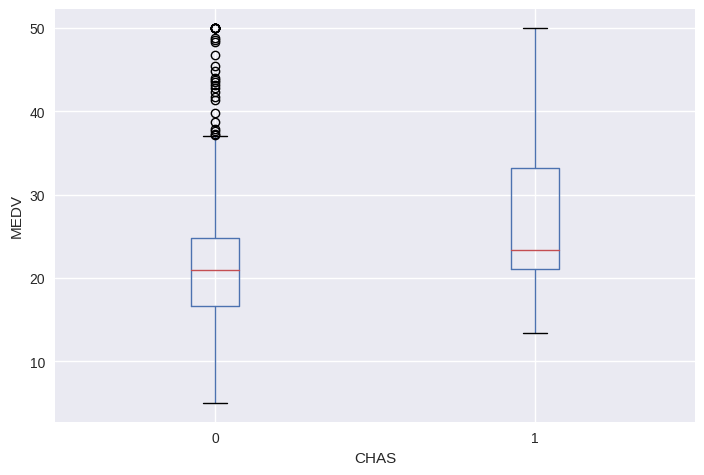

In [25]:
#typically we draw box plots on Y-axis, but it can also be turned on x

#horizontal line is the 50th percentile
#box covers 50% of the data
#top of the box represents the 75th percentile
#botton of the box represents the 25th percentile
#it can help as assess the skewness of data


ax = housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_ylabel('MEDV')
plt.suptitle('')  # Suppress the titles
plt.title('')

plt.show()

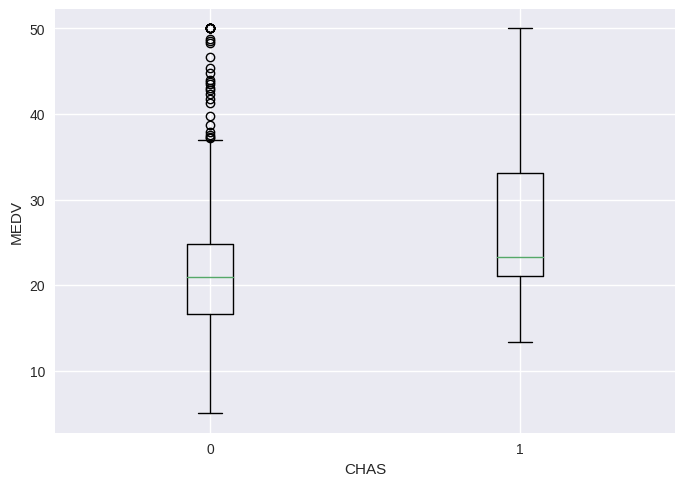

In [26]:
dataForPlot = [list(housing_df[housing_df.CHAS==0].MEDV), list(housing_df[housing_df.CHAS==1].MEDV)]
fig, ax = plt.subplots()
ax.boxplot(dataForPlot)
ax.set_xticks([1, 2], minor=False)
ax.set_xticklabels([0, 1])
ax.set_xlabel('CHAS')
ax.set_ylabel('MEDV')
plt.show()

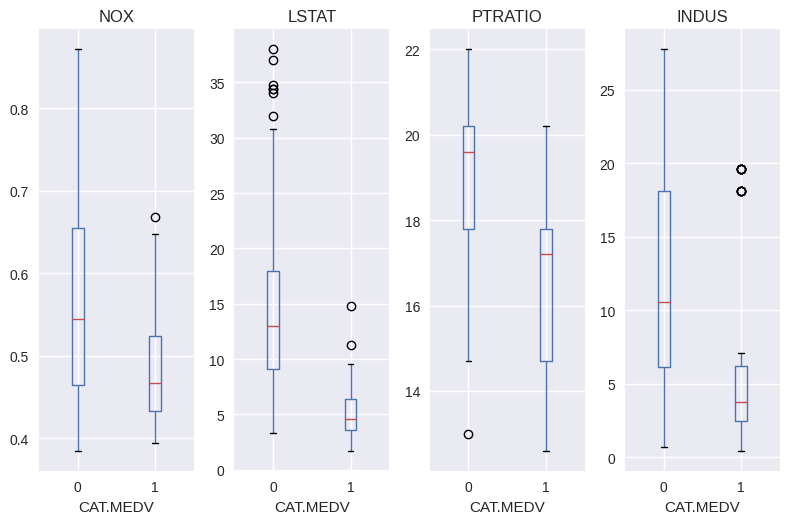

In [27]:
#Side by side boxplots
fig, axes = plt.subplots(nrows=1, ncols=4)
housing_df.boxplot(column='NOX', by='CAT_MEDV', ax=axes[0])
housing_df.boxplot(column='LSTAT', by='CAT_MEDV', ax=axes[1])
housing_df.boxplot(column='PTRATIO', by='CAT_MEDV', ax=axes[2])
housing_df.boxplot(column='INDUS', by='CAT_MEDV', ax=axes[3])
for ax in axes:
    ax.set_xlabel('CAT.MEDV')
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

In [28]:
import plotly.subplots as sp

# Create subplots with 1 row and 4 columns
fig = sp.make_subplots(rows=1, cols=4, subplot_titles=['NOX', 'LSTAT', 'PTRATIO', 'INDUS'])

# Define the categories for CAT_MEDV
categories = housing_df['CAT_MEDV'].unique()

# Loop through the columns and create box plots
for i, column in enumerate(['NOX', 'LSTAT', 'PTRATIO', 'INDUS']):
    for category in categories:
        data = housing_df[housing_df['CAT_MEDV'] == category][column]
        trace = go.Box(
            x=[category] * len(data),
            y=data
        )
        fig.add_trace(trace, row=1, col=i + 1)

# Update the x-axis labels and layout
x_axis_labels = {'NOX': 'NOX', 'LSTAT': 'LSTAT', 'PTRATIO': 'PTRATIO', 'INDUS': 'INDUS'}
#fig.update_xaxes(title_text='CAT.MEDV', tickvals=categories, ticktext=[x_axis_labels[column] for column in ['NOX', 'LSTAT', 'PTRATIO', 'INDUS']], row=1, col=1)
#fig.update_xaxes(title_text='CAT.MEDV', showticklabels=False, row=1, col=2)
#fig.update_xaxes(title_text='CAT.MEDV', showticklabels=False, row=1, col=3)
#fig.update_xaxes(title_text='CAT.MEDV', showticklabels=False, row=1, col=4)

fig.update_yaxes(title_text='Values', row=1, col=1)
fig.update_xaxes(title_text='CAT.MEDV', row=1, col= 1)
fig.update_xaxes(title_text='CAT.MEDV', row=1, col= 2)
fig.update_xaxes(title_text='CAT.MEDV', row=1, col= 3)
fig.update_xaxes(title_text='CAT.MEDV', row=1, col= 4)

# Update the subplot titles
fig.update_layout(
    title='Side by Side Boxplots',
    showlegend=False
)

# Show the plot
fig.show()


MEDV by CHAS (Charles River dummy variable):
- Properties near Charles River (CHAS=1) have a higher mean value (28.44) compared to those not near the river (22.09).
- There's more variability in prices for riverside properties (std dev of 11.82 vs 8.83).
- Both groups have the same maximum value of 50.0, which might indicate a ceiling effect in the data.

Outliers in MEDV:

- There are 40 outliers in MEDV.
- Most outliers are on the high end (37.0 to 50.0), with only two low outliers at 5.0.

- The presence of multiple 50.0 values suggests a possible truncation of data at this upper limit.

NOX (Nitric Oxides Concentration) by CAT. MEDV:
- Lower value homes (CAT. MEDV = 0) have higher NOX levels (mean 0.567) compared to higher value homes (mean 0.494).
- There are no outliers in NOX, suggesting a relatively consistent distribution.


LSTAT (% lower status of the population) by CAT. MEDV:
- There's a strong negative relationship: lower value homes have much higher LSTAT (mean 14.15) compared to higher value homes (mean 5.14).
- There are 7 outliers, all on the high end (31.99 to 37.97), indicating some areas with exceptionally high percentages of lower status population.

PTRATIO (Pupil-teacher ratio) by CAT. MEDV:
- Lower value homes have higher pupil-teacher ratios (mean 18.88) compared to higher value homes (mean 16.31).
- There are 15 outliers, all on the low end (12.6 to 13.0), suggesting some areas with exceptionally good pupil-teacher ratios.


INDUS (Proportion of non-retail business acres) by CAT. MEDV:
- Lower value homes are in areas with higher proportions of non-retail business (mean 12.26) compared to higher value homes (mean 5.51).
- There are no outliers in INDUS.


Correlation Matrix:
- MEDV has strong negative correlations with LSTAT (-0.738) and moderate negative correlations with PTRATIO (-0.508), INDUS (-0.484), and NOX (-0.427).
- NOX and INDUS have a strong positive correlation (0.764), suggesting industrial areas have higher nitric oxide levels.
- LSTAT has moderate to strong positive correlations with NOX (0.591) and INDUS (0.604).

Insights:
- Charles River proximity is associated with higher home values, but also with more price variability (we noticed that earlier).
- Environmental factors (NOX) have a clear relationship with home values, with lower pollution associated with higher values.

- Socioeconomic status (LSTAT) has the strongest relationship with home values, indicating that neighborhood demographics are a key factor in housing prices.

- Education quality (as measured by PTRATIO) shows a clear relationship with home values, with lower ratios (potentially indicating better schools) associated with higher home values.

- Industrial presence (INDUS) is negatively associated with home values, suggesting a preference for residential or mixed-use areas.

- The strong correlations between NOX, INDUS, and LSTAT suggest that industrial areas tend to have higher pollution and lower socioeconomic status.

- The presence of outliers, particularly in MEDV and LSTAT, indicates some extreme cases that might warrant further investigation.